## Assignment - 0010
1. Extend your Neural Network to work with various optimizer and design various regularizer to avoid overfitting.
2. Test your model on same set of datasets provided in your prior assignment such as MNIST and F-MNIST/K-MNIST
2. No - Plagarism. If solutions match, then the student who shared the solution and students who copied will be reported to USF and will get F in this course.
3. You can discuss, but have to code and provide your own solution. Provide name of the person or persons with whom you had discussion

## Things to Do
 
1. Now you will Create a 4 layer Neural Network, (W1, W2, W3, W4)
2. H1 = $X \cdot W1$ + b1, Z1 = $\sigma$(H1), where $\sigma$ is your activation function, $\cdot$ is your hardamard product, H denotes pre-activation and Z denotes post-activation.
3. Recursively construct your NN, H2 = (Z1 $\cdot$W2) + b2, Z2 = $\sigma$(H2), H3 = (Z2 $\cdot$ W3) + b3, z3 = $σ$(H3) and final output layer is H4 = (Z3 $\cdot$ W4) + b4, z3 = $σ^1$(H4), where $σ^1$ is your softmax function.
4. The objective function that you have used in your prior assignment is termed as cross-entropy, denoted as follows J($\theta$) = $-{(y\log(p) + (1 - y)\log(1 - p))}$ for binary classification, whereas for multi-class classification we denote it as J($\theta$) = $-\sum_{c=1}^My_{o,c}\log(p_{o,c})$, where M - number of classes, log - the natural log, y - binary indicator (0 or 1) if class label c is the correct classification for observation o and finally p - predicted probability observation o is of class c.
5. Now in this assignment you will be using 2 regularizer L1 and L2 and will modify above equation as follows: For L1 J($θ$)_1 = J($\theta$) + $λ$$||w||^1_1$, where $λ$ is another set of hyper-parameter that adjusts your L1 penality,   $||w||^1_1$ = $\sum_{i=1}^N$ $|w_i|$ adds absolute value of magnitude as penality term to the loss function, $N$ denotes total number of layers.
6. Whereas L2 is defined as follows: J($θ$)_2 = J($\theta$) + $λ$$||w||^2_2$, where  $||w||^2_2$ = $\sum_{i=1}^N$ $|w_i^2|$ adds squared magnitude as penality term to the loss function.
6. Play with various optimizer such as Adam, RMSProp, Momentum
4. Normalize your data within 0-1 range, create one-hot encoding for your labels.
5. Take 3digit of your first name, and convert them based on character indices - For example: Ank ---> 1 14 11, so my seed is 11411. This will ensure each students have unique seeds.
6. Run your experiments for minimum $20$ epochs. Remember one epoch is entire pass through data.
7. You will run each experiment min $7$ times and report your average accuracy and standard error -- Change seed per trial
8. We have provided 2 folders, members of Teams A - E will work on data that says Team_red and Team F- K will work on data that says Team_blue
9. Important: All parameter optimization should be done on Validation/Dev set, you will only do one pass inference over test set.
10. Complete all code blocks highlighted as TODO
11. Sumbit your code, your report with findings and upload on canvas.

## Rubric
1. Total marks = 10% of your total grade. 
2. This assignment is of worth 100 points, which will be converted into 10.
3. If you train on Vaidation and test sets ---- (0 or -100 Points)
4. Results with only one trial is reported ---- (-20 points)
5. Experiments are performed on only one dataset ---- (-50 points)
6. Code is not working or has some bugs, Depending on bug ---- (-15 to -60 points)
7. Only L1 regularization is used ---- (-50 points)
8. This assignment requires you to have 4 layer model, if only 3 layer is shown --- (-25 points)
9. No test or comparsion with optimizers, Atleast show one experiments that provide reasoning why X optimizer is selected  --- (-20 points)
9. Submiting some random solution without following template ---- (-100 points)


In [407]:
import os
import numpy as np
import time
import tensorflow as tf

import matplotlib.pyplot as plt

seed = 16122+30
np.random.seed(seed) ## Use your own unique seed
tf.random.set_seed(seed) ## Use your own unique seed

## Author - Ankur Mali
## Code designed for intro to DL at University of South Florida

In [408]:
## Define model specific parameters
## Repalce None with values
size_input = 28*28
size_hidden = 128
size_hidden1 = 64
size_hidden2 = 64
size_hidden3 = 64
size_output = 10
number_of_train_examples = 50000
number_of_dev_examples = 10000
number_of_test_examples = 10000
batch_size = 1024
NUM_EPOCHS = 20

In [409]:
## TODO
## Load Data
X_train = np.load('x_train.npy').reshape(-1,784)
X_test = np.load('x_test.npy').reshape(-1,784)
# with np.load('train-imgs.npz') as data:
#   arrays = data.files
#   arr = data[arrays [0]]
# new_shape = (-1,784)
# X_train = np.reshape(arr, new_shape)

# with np.load('test-imgs.npz') as data:
#   arrays = data.files
#   arr = data[arrays [0]]
# new_shape = (-1,784)
# X_test = np.reshape(arr, new_shape)
# # X_test = np.load('X_test.npy').reshape(-1,784)
# with np.load('train-labels.npz') as data:
#   arrays = data.files
#   Y_train = data[arrays [0]]

# with np.load('test-labels.npz') as data:
#   arrays = data.files
#   Y_test = data[arrays [0]]


## Create Validation data from train splits

Y_train = np.load('y_train.npy')
Y_test = np.load('y_test.npy')
# Y_train = np.load('train-labels.npz')
# Y_test = np.load('test-labels.npz')
# X_train = X_train.reshape(50000, 28*28)
# X_val = X_val.reshape(10000, 28*28)
# X_test = X_test.reshape(10000, 28*28)
X_val, Y_val = X_train[50000:], Y_train[50000:] 
X_train,Y_train = X_train[:50000], Y_train[:50000]



In [410]:
#@title Default title text
## TODO
# Normalize your X
# X_train = (X_train - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)
# X_val = (X_val - np.mean(X_val,axis=0)) / np.std(X_val,axis=0)
# X_test = (X_test - np.mean(X_test,axis=0)) / np.std(X_test,axis=0)
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255
# Convert your labels into one-hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train, size_output)
Y_val = tf.keras.utils.to_categorical(Y_val,size_output)
Y_test = tf.keras.utils.to_categorical(Y_test,size_output)
# Hint look into function tf.keras.utils.to_categorical or Other function is tf.one_hot()

In [411]:
hyperparam_l1 = 0.01 # Set the strength of L1 regularization penalty
hyperparam_l2 = 0.01

In [412]:
# Define class to build mlp model
class MLP(object):
 def __init__(self, size_input, size_hidden1, size_hidden2, size_hidden3, size_output,device=None):
    """
    size_input: int, size of input layer
    size_hidden1: int, size of the 1st hidden layer
    size_hidden2: int, size of the 2nd hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """
    self.size_input, self.size_hidden1, self.size_hidden2, self.size_hidden3, self.size_output, self.device =\
    size_input, size_hidden1, size_hidden2, size_hidden3, size_output, device
    
    ### TODO
    ### Declare all your variables
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden1]))
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden1, self.size_hidden2]))
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden2, self.size_hidden3]))
    self.W4 = tf.Variable(tf.random.normal([self.size_hidden3, self.size_output]))

    self.b1 = tf.Variable(tf.zeros([1, self.size_hidden1]))
    self.b2 = tf.Variable(tf.zeros([1, self.size_hidden2]))
    self.b3 = tf.Variable(tf.zeros([1, self.size_hidden3]))
    self.b4 = tf.Variable(tf.zeros([1, self.size_output]))

    
    
    
    # Define variables to be updated during backpropagation
    
    
    self.variables = [self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4]
  
 def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y

 def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    ## TODO
    
    # Convert your pred and true to tf.float32
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    # Ensure your shapes are (batch_size, size_output)
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # This above function will add softmax to your final layer and then perform cross-entropy
    

    # TODO
    # Modify above loss and add L1 or L2 regularization
    l1_reg = 0.0001 * tf.reduce_sum(tf.abs(self.variables[0]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[1]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[2]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[3]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[4]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[5]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[6]))+0.0001 * tf.reduce_sum(tf.abs(self.variables[7]))
    # l2_reg = 0.0001 * tf.reduce_sum(tf.square(self.variables[0]))+0.0001 * tf.reduce_sum(tf.square(self.variables[1]))+0.0001 * tf.reduce_sum(tf.square(self.variables[2]))+0.0001 * tf.reduce_sum(tf.square(self.variables[3]))+0.0001 * tf.reduce_sum(tf.square(self.variables[4]))+0.0001 * tf.reduce_sum(tf.square(self.variables[5]))+0.0001 * tf.reduce_sum(tf.square(self.variables[6]))+0.0001 * tf.reduce_sum(tf.square(self.variables[7]))
    loss_x = cce(y_true_tf, y_pred_tf)+l1_reg
    
    
    return loss_x

 def backward(self, X_train, y_train):
    """
    backward pass
    """

    lr = 0.003 #Play with your learning rate
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr) # Play with various Optimizers and pick the one that works best for your design
    
    with tf.GradientTape() as tape:
        
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
        
    grads = tape.gradient(current_loss, self.variables)
    optimizer.apply_gradients(zip(grads, self.variables)) # Optimizer
           
 def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)

    ## TODO
    H1 = tf.matmul(X_tf, self.W1) + self.b1
    Z1 = tf.nn.sigmoid(H1)
    H2 = tf.matmul(Z1, self.W2) + self.b2
    Z2 = tf.nn.sigmoid(H2)
    H3 = tf.matmul(Z2, self.W3) + self.b3
    Z3 = tf.nn.sigmoid(H3)
    
    # Compute values in hidden layers
    

    # Compute output
    output = tf.matmul(Z3, self.W4) + self.b4 # Logits
    
    # Remember the loss function has keras loss objective, that explicitly applies softmax over logits
    return (output)


Train Accuracy: 0.6661
Number of Epoch = 1 - Average Cross Entropy:= 0.006334930419921875 

Validation Accuracy: 0.6787

Train Accuracy: 0.7964
Number of Epoch = 2 - Average Cross Entropy:= 0.004853572692871093 

Validation Accuracy: 0.8096

Train Accuracy: 0.8472
Number of Epoch = 3 - Average Cross Entropy:= 0.004238345642089844 

Validation Accuracy: 0.8563

Train Accuracy: 0.8743
Number of Epoch = 4 - Average Cross Entropy:= 0.0037878671264648437 

Validation Accuracy: 0.8757

Train Accuracy: 0.8918
Number of Epoch = 5 - Average Cross Entropy:= 0.0034184320068359375 

Validation Accuracy: 0.8918

Train Accuracy: 0.9026
Number of Epoch = 6 - Average Cross Entropy:= 0.00310399169921875 

Validation Accuracy: 0.9047

Train Accuracy: 0.9122
Number of Epoch = 7 - Average Cross Entropy:= 0.0028339202880859377 

Validation Accuracy: 0.9118

Train Accuracy: 0.9196
Number of Epoch = 8 - Average Cross Entropy:= 0.002602145690917969 

Validation Accuracy: 0.9175

Train Accuracy: 0.9259
Number

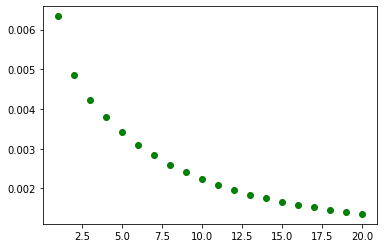

In [413]:
# Initialize model using GPU
mlp_on_gpu = MLP(size_input, size_hidden1, size_hidden2, size_hidden3, size_output, device='gpu')

time_start = time.time()

for epoch in range(NUM_EPOCHS):
    
  loss_total = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
    
  train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(25, seed=epoch*(seed)).batch(batch_size)
  kz = 0
  accuracy_z = 0.0
  cur_train_acc = 0.0
  for inputs, outputs in train_ds:
    qw, tr = tf.shape(inputs)
    kz = kz + 1
    preds = mlp_on_gpu.forward(inputs) 
    loss_total = loss_total + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)

  preds = mlp_on_gpu.forward(X_train)
  # Get probs, remember we only have logits from our forward function, we need to apply softmax on top of it to get probs
  preds = tf.nn.softmax(preds)
  correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_train, 1))
  accuracy_z = accuracy_z + tf.reduce_mean(tf.cast(correct_prediction, "float"))
  cur_train_acc += accuracy_z.numpy()
  ds = cur_train_acc
  print('\nTrain Accuracy: {:.4f}'.format(ds))
  print('Number of Epoch = {} - Average Cross Entropy:= {} '.format(epoch + 1, np.sum(loss_total) / X_train.shape[0]))
  
  ## TODO

  ## Now calculate Validation Accuracy
  preds = mlp_on_gpu.forward(X_val)
  preds = tf.nn.softmax(preds)
  correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_val, 1))
  accuracy_z =  tf.reduce_mean(tf.cast(correct_prediction, "float"))
  cur_val_acc = accuracy_z.numpy()
  
  

  print('\nValidation Accuracy: {:.4f}'.format(cur_val_acc))
  
  plt.plot(epoch + 1, np.sum(loss_total) / X_train.shape[0], 'go')


        
time_taken = time.time() - time_start
    

    


print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))
#For per epoch_time = Total_Time / Number_of_epochs

In [414]:
test_loss_total = tf.Variable(0, dtype=tf.float32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).shuffle(25, seed=epoch*(seed)).batch(batch_size)
#test_loss_total = 0.0
for inputs, outputs in test_ds:
  preds = mlp_on_gpu.forward(inputs)
  preds = tf.nn.softmax(preds)
  test_loss_total = test_loss_total + mlp_on_gpu.loss(preds, outputs)
accuracy_test=0.0
cur_test_acc=0.0
avg_mse = np.sum(test_loss_total.numpy()) / X_test.shape[0]
print('Test Standard error: {:.4f}'.format(np.sqrt(avg_mse)))
preds = mlp_on_gpu.forward(X_test)
preds = tf.nn.softmax(preds)
correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_test, 1))
accuracy_test =   tf.reduce_mean(tf.cast(correct_prediction, "float"))
cur_test_acc = accuracy_test.numpy()

print('\nTest Accuracy: {:.4f}'.format(cur_test_acc))

Test Standard error: 0.0523

Test Accuracy: 0.9365
